##### Copyright 2019 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 합성곱 신경망

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    TensorFlow.org에서 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/ko/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/ko/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    깃허브(GitHub) 소스 보기</a>
  </td>
</table>

Note: 이 문서는 텐서플로 커뮤니티에서 번역했습니다. 커뮤니티 번역 활동의 특성상 정확한 번역과 최신 내용을 반영하기 위해 노력함에도
불구하고 [공식 영문 문서](https://www.tensorflow.org/?hl=en)의 내용과 일치하지 않을 수 있습니다.
이 번역에 개선할 부분이 있다면
[tensorflow/docs](https://github.com/tensorflow/docs) 깃헙 저장소로 풀 리퀘스트를 보내주시기 바랍니다.
문서 번역이나 리뷰에 참여하려면
[docs-ko@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ko)로
메일을 보내주시기 바랍니다.

이 튜토리얼은 MNIST 숫자를 분류하기 위해 간단한 [합성곱 신경망](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network)(Convolutional Neural Network, CNN)을 훈련합니다. 간단한 이 네트워크는 MNIST 테스트 세트에서 99% 정확도를 달성할 것입니다. 이 튜토리얼은 [케라스 Sequential API](https://www.tensorflow.org/guide/keras)를 사용하기 때문에 몇 줄의 코드만으로 모델을 만들고 훈련할 수 있습니다.

노트: GPU를 사용하여 CNN의 훈련 속도를 높일 수 있습니다. 코랩에서 이 노트북을 실행한다면 * 수정 -> 노트 설정 -> 하드웨어 가속기* 에서 GPU를 선택하세요.

### 텐서플로 임포트하기

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 380.5MB 47kB/s 
     |████████████████████████████████| 501kB 31.9MB/s 
     |████████████████████████████████| 4.3MB 52.4MB/s 


In [0]:
# tensorflow version 확인 
print(tf.__version__)

2.0.0-rc1


### MNIST 데이터셋 다운로드하고 준비하기

In [0]:
import matplotlib.pyplot as plt # 시각화 

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

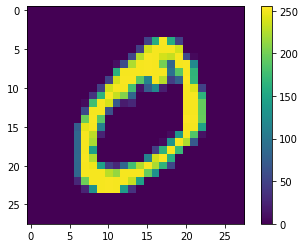

In [0]:
# Data Exploration
# 네트워크를 훈련하기 전에 데이터를 전처리해야 하며, 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있음 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

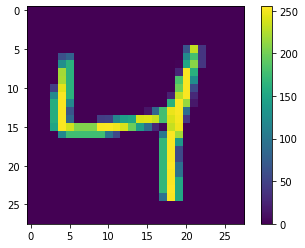

In [0]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()

In [0]:
# 흑백 이미지 형태라 컬러 채널 차원의 크기가 1이라 이를 넣어주기 위해 아래와 같이 reshape 를 수행 

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [0]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
# 정규화되지 않은 상태 (Unnormalized)에서는 Learning rate를 매우 작게 해야 학습이 되는 불편함이 있고
# 정규화를 하면 Gradient Descent Algorithm 으로 쉽고 빠르게 최적화 지점을 찾기 때문에 아래와 같이 픽셀 값을 0과 1사이로 정규화를 함 

In [0]:
# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
train_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [0]:
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

### 합성곱 층 만들기

아래 6줄의 코드에서 [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)와 [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) 층을 쌓는 일반적인 패턴으로 합성곱 층을 정의합니다.

CNN은 배치(batch) 크기를 제외하고 (이미지 높이, 이미지 너비, 컬러 채널) 크기의 텐서(tensor)를 입력으로 받습니다. MNIST 데이터는 (흑백 이미지이기 때문에) 컬러 채널(channel)이 하나지만 컬러 이미지는 (R,G,B) 세 개의 채널을 가집니다. 이 예에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하는 CNN을 정의하겠습니다. 이 값을 첫 번째 층의 `input_shape` 매개변수로 전달합니다.

In [0]:
# filters: 몇 개의 다른 종류의 필터를 활용할 것인지를 나타냄. 출력 모양의 깊이(depth) 를 결정한다.
# kernel_size: 연산을 수행할 때 윈도우의 크기를 의미한다.
# strides: 연산을 수행할 때 윈도우가 가로 그리고 세로로 움직이면서 내적 연산을 수행하는데, 한 번에 얼마나 움직일지를 의미한다.

model = models.Sequential()
# filters: 32 / kernel_size: (3, 3)  
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# kernel_size: (2, 2) 
model.add(layers.MaxPooling2D((2, 2)))

# filters: 64 / kernel_size: (3, 3)  
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# kernel_size: (2, 2) 
model.add(layers.MaxPooling2D((2, 2)))

# filters: 64 / kernel_size: (3, 3) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

지금까지 모델의 구조를 출력해 보죠.

In [0]:
# convolution 연산 후 2가 감소해서 이미지 사이즈가 (26, 26, 32)으로 감소 / 필터 개수는 동일
# max pooling 연산 후 1/2로 감소해서 이미지 사이즈가 (13, 13, 32)으로 감소 / 필터 개수는 동일
# convolution 연산 후 2가 감소해서 이미지 사이즈가 (11, 11, 64)로 감소 / 필터 개수는 동일
# max pooling 연산 후 1/2로 감소해서 이미지 사이즈 (5, 5, 64)로 감소 / 필터 개수는 동일
# convolution 연산 후 2가 감소해서 이미지 사이즈가 (3, 3, 64)로 감소 / 필터 개수는 동일 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


위에서 Conv2D와 MaxPooling2D 층의 출력은 (높이, 너비, 채널) 크기의 3D 텐서입니다. 높이와 너비 차원은 네트워크가 깊어질수록 감소하는 경향을 가집니다. Conv2D 층에서 출력 채널의 수는 첫 번째 매개변수에 의해 결정됩니다(예를 들면, 32 또는 64). 일반적으로 높이와 너비가 줄어듦에 따라 (계산 비용 측면에서) Conv2D 층의 출력 채널을 늘릴 수 있습니다.

### 마지막에 Dense 층 추가하기

모델을 완성하려면 마지막 합성곱 층의 출력 텐서(크기 (3, 3, 64))를 하나 이상의 Dense 층에 주입하여 분류를 수행합니다. Dense 층은 벡터(1D)를 입력으로 받는데 현재 출력은 3D 텐서입니다. 먼저 3D 출력을 1D로 펼치겠습니다. 그다음 하나 이상의 Dense 층을 그 위에 추가하겠습니다. MNIST 데이터는 10개의 클래스가 있으므로 마지막에 Dense 층에 10개의 출력과 소프트맥스 활성화 함수를 사용합니다.

In [0]:
# (3, 3, 64) 출력을 3*3*64 로 계산해서 (576) 벡터로 펼침 
model.add(layers.Flatten())
# Dense Layer (Fully Connected Layer) 추가 후 활성화 함수를 relu로 설정
# relu를 쓰는 이유는 가중치 총합 a가 큰 경우에도 기울기(gradient)가 1로 유지되므로 그래디언트 감소(gradient vanishing)문제가 생기지 않음 
# gradient vanishing -> input layer에 가까운 hidden layer일 수록 weight가 아예 업데이트되지 않아 학습이 되지 않는 현상  
model.add(layers.Dense(64, activation='relu'))
# 최고 출력의 위치를 변화시키 않으면서 총합을 1로 유지하여 출력에 확률론적 의미를 부여할 수 있기 소프트맥스 (softmax) 활성화 함수를 사용 
model.add(layers.Dense(10, activation='softmax'))

최종 모델의 구조를 확인해 보죠.

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

여기에서 볼 수 있듯이 두 개의 Dense 층을 통과하기 전에 (3, 3, 64) 출력을 (576) 크기의 벡터로 펼쳤습니다.

### 모델 컴파일과 훈련하기

In [0]:
# optimizer는 실제로 Gradient Descent로 w를 업데이트하는 알고리즘
# loss (오차함수): sparse_categorical_crossentropy: 범주형 교차 엔트로피(categorical crossentropy)와 동일하지만 
# 이 경우 원-핫 인코딩이 된 상태일 필요없이 정수 인코딩 된 상태에서 수행 가능.
# metric: 모델 훈련을 모니터링하기 위한 지표 (현재는 정확도인 accuracy로 세팅)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델이 학습을 수행 - model.fit(...)
# train_image: 훈련 데이터
# train_label: 라벨 데이터 
# epoch가 1이면 전체 데이터를 1번 훝고 나간 것을 의미 / 지금은 5번 전체 데이터를 훑고 나가는 것을 의미  

In [0]:
# 원본 코드 
# model.fit(train_images, train_labels, epochs=5)

%%time
#hist1 = model.fit(train_images, train_labels, epochs=5)
hist1 = model.fit(train_images, train_labels, epochs=5, batch_size=600,
                   validation_data=(test_images, test_labels), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 9s - loss: 0.5457 - accuracy: 0.8547 - val_loss: 0.1244 - val_accuracy: 0.9630
Epoch 2/5
60000/60000 - 1s - loss: 0.1091 - accuracy: 0.9669 - val_loss: 0.0755 - val_accuracy: 0.9768
Epoch 3/5
60000/60000 - 1s - loss: 0.0725 - accuracy: 0.9782 - val_loss: 0.0505 - val_accuracy: 0.9843
Epoch 4/5
60000/60000 - 1s - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0440 - val_accuracy: 0.9858
Epoch 5/5
60000/60000 - 1s - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0374 - val_accuracy: 0.9878
CPU times: user 7.84 s, sys: 2.63 s, total: 10.5 s
Wall time: 14.1 s


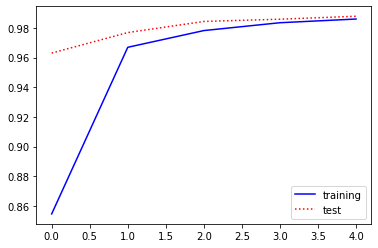

In [0]:
# 시각화 
plt.plot(hist1.history['accuracy'], 'b-', label="training")
plt.plot(hist1.history['val_accuracy'], 'r:', label="test")
plt.legend()
plt.show()

In [0]:
# 추가된 코드 
# 백엔드 추가 
import tensorflow.keras.backend as K

In [0]:
# 추가된 코드 
# 첫 번째 layer 의 weight 와 bias 정보 추출 
l21 = model.layers[0]
w21, b21 = l21.get_weights()

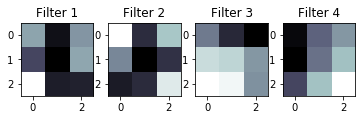

In [0]:
# 추가된 코드
import matplotlib as mpl

# 필터 확인 
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w21[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.title("Filter {}".format(i + 1))
    plt.grid(False)

In [0]:
# 추가된 코드 
# 세 번째 layer 의 weight 와 bias 정보 추출 
l22 = model.layers[2]
w22, b22 = l22.get_weights()

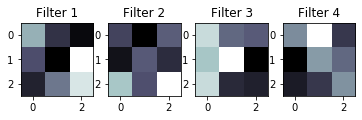

In [0]:
# 추가된 코드 
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w22[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.title("Filter {}".format(i + 1))
    plt.grid(False)

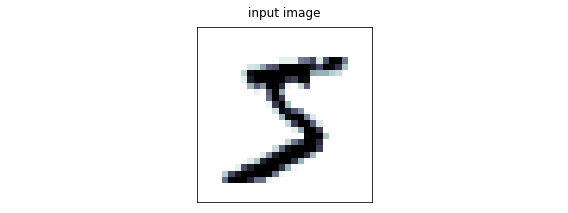

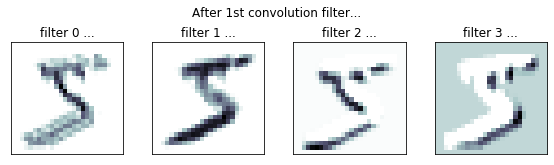

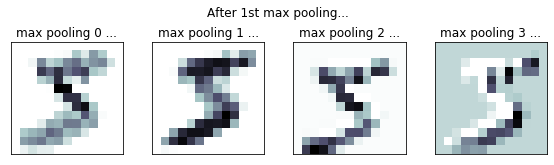

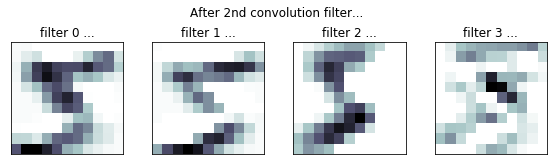

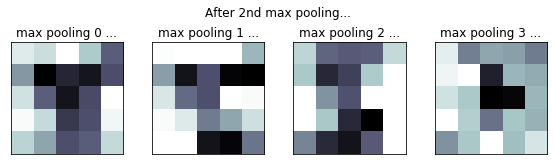

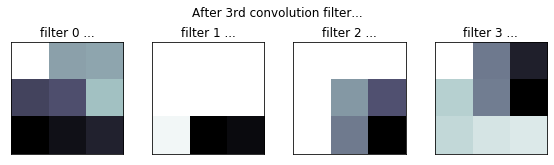

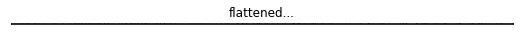

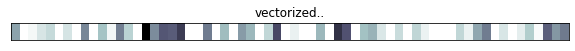

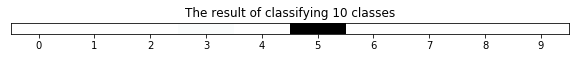

In [0]:
# Reference: https://datascienceschool.net/view-notebook/8fe08ad706984c3c8acaa44b787dcac0/
# 추가된 코드 
import numpy as np

f20 = K.function([model.input], [model.layers[0].output])
f21 = K.function([model.input], [model.layers[1].output])
f22 = K.function([model.input], [model.layers[2].output])
f23 = K.function([model.input], [model.layers[3].output])
f24 = K.function([model.input], [model.layers[4].output])
f25 = K.function([model.input], [model.layers[5].output])
f26 = K.function([model.input], [model.layers[6].output])
f27 = K.function([model.input], [model.layers[7].output])

# X_train: train_images

def visualize2(n):
    x = train_images[n:n + 1]
    plt.figure(figsize=(8, 3))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        if i == 1:
            plt.imshow(x[0, :, :, 0], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.imshow(np.zeros_like(x[0, :, :, 0]), cmap=mpl.cm.bone_r)
            plt.axis("off")
    plt.tight_layout()
    plt.suptitle("input image", y=1)
    
    z0 = f20([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z0[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("filter {} ...".format(i))
    plt.tight_layout()
    plt.suptitle("After 1st convolution filter...", y=1.1)
    
    z1 = f21([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z1[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("max pooling {} ...".format(i))
    plt.tight_layout()
    plt.suptitle("After 1st max pooling...", y=1.1)
        
    z2 = f22([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z2[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("filter {} ...".format(i))
    plt.tight_layout()
    plt.suptitle("After 2nd convolution filter...", y=1.1)
    
    z3 = f23([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z3[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("max pooling {} ...".format(i))
    plt.tight_layout()
    plt.suptitle("After 2nd max pooling...", y=1.1)

    z4 = f24([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z4[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("filter {} ...".format(i))
    plt.tight_layout()
    plt.suptitle("After 3rd convolution filter...", y=1.1)

    z5 = f25([x])[0]
    plt.figure(figsize=(9, 2))
    plt.imshow(z5, aspect=2, cmap=mpl.cm.bone_r)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("flattened...")

    z6 = f26([x])[0]
    plt.figure(figsize=(10, 2))
    plt.imshow(z6, aspect=2, cmap=mpl.cm.bone_r)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("vectorized..")
    
    z7 = f27([x])[0]
    plt.figure(figsize=(10, 1))
    plt.imshow(z7, aspect=0.2, cmap=mpl.cm.bone_r)
    plt.xticks(range(10)); plt.yticks([]); plt.grid(False)
    plt.title("The result of classifying 10 classes")

visualize2(0)

### 모델 평가

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 1s - loss: 0.0193 - accuracy: 0.9878


In [0]:
print(test_acc)

0.9878


결과에서 보듯이 간단한 CNN 모델이 99%의 테스트 정확도를 달성합니다. 몇 라인의 코드치고 나쁘지 않네요! (케라스의 서브클래싱 API와 GradientTape를 사용하여) CNN을 만드는 또 다른 방법은 [여기](https://github.com/tensorflow/docs/blob/master/site/ko/tutorials/quickstart/advanced.ipynb)를 참고하세요.